In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')

import matplotlib.pyplot as plt
import json

In [6]:
df = pd.read_csv("../data/hr_neighbors.csv")
df_clean = df[(df.numRxPackets >= 0) & (df.numTxPackets >= 0) & (df.numTxFailures >= 0) & (df.rssi<0)]
df_reduced = df_clean[df.time < 1461276552]
df_clean["numTxGood"] = df_clean.numTxPackets - df.numTxFailures
df_clean

/home/keoma/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/keoma/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


time  moteid  neighborId  neighborFlag  rssi  numTxPackets  \
0       1461014657      11          20             0   -80             0   
1       1461014657      11           3             0   -80            55   
2       1461014657      11           7             0   -84           295   
3       1461014657      11          11             0   -76             0   
4       1461014657      11          12             0   -78             0   
5       1461014657      11          15             0   -73             0   
6       1461014657      11          17             0   -84             0   
7       1461014657      11          19             0   -85             0   
8       1461014957      11          16             0   -80             0   
9       1461015556      11          20             0   -80             0   
10      1461015556      11           3             0   -80            54   
11      1461015556      11           7             0   -85           306   
12      1461015556      11          11             0   -75             0   
13      1461015556      11          12             0   -79             0   
14      1461015556      11          15             0   -73             0   
15      1461015556      11          17             0   -81             0   
16      1461015556      11          19             0   -84             0   
17      1461015857      11          16             0   -81             0   
18      1461016456      11          20             0   -81             0   
19      1461016456      11           3             0   -81            55   
20      1461016456      11           7             0   -84           303   
21      1461016456      11          11             0   -76             0   
22      1461016456      11          12             0   -77             0   
23      1461016456      11          15             0   -72             0   
24      1461016456      11          17             0   -81             0   
25      1461016456      11          19             0   -84             0   
26      1461016756      11          16             0   -80             0   
27      1461017357      11          20             0   -80             0   
28      1461017357      11           3             0   -80            57   
29      1461017357      11           7             0   -85           293   
...            ...     ...         ...           ...   ...           ...   
346080  1466978046       3           1             0   -91           337   
346081  1466978046       3           2             0   -70           772   
346082  1466978046       3           4             0   -88             0   
346083  1466978046       3           6             0   -93             0   
346084  1466978046       3           8             0   -69             0   
346085  1466978046       3          11             0   -84             0   
346086  1466978046       3          19             0   -84             0   
346087  1466979272       3          20             0   -89             0   
346088  1466979272       3           1             0   -92           308   
346089  1466979272       3           2             0   -69           748   
346090  1466979272       3           4             0   -88             0   
346091  1466979272       3           6             0   -92             0   
346092  1466979272       3           8             0   -68             0   
346093  1466979272       3          11             0   -80             0   
346094  1466979272       3          19             0   -84             0   
346095  1466980410       3          20             0   -90             0   
346096  1466980410       3           1             0   -92           276   
346097  1466980410       3           2             0   -68           755   
346098  1466980410       3           4             0   -88             0   
346099  1466980410       3           6             0   -92             0   
346101  1466980410       3          11             0   -80    

In [4]:
#df.numRxPackets.describe()
#df.neighborFlag.value_counts()

#df.moteid.value_counts()
#df.rssi.hist()
#df.groupby(["moteid","time"]).count()
plt.figure();
grouped = df_clean.groupby(["moteid","neighborId"])

/home/keoma/.local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=312864.0, right=312864.0
  'left=%s, right=%s') % (left, right))
/home/keoma/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/keoma/.local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=308418.0, right=308418.0
  'left=%s, right=%s') % (left, right))
/home/keoma/.local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attem

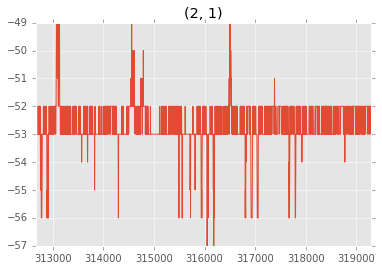

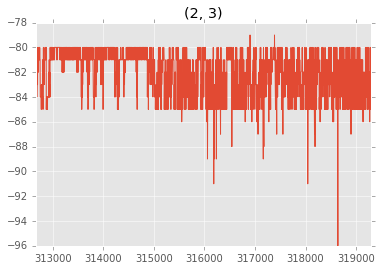

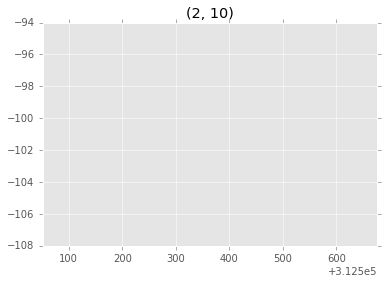

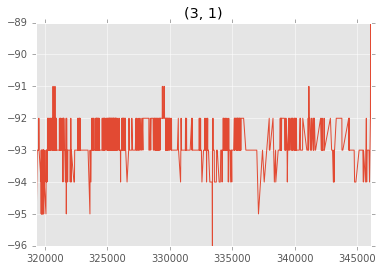

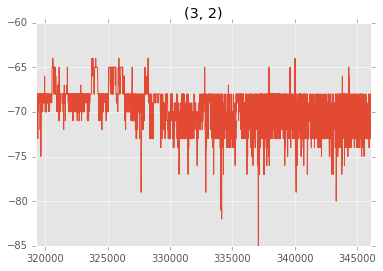

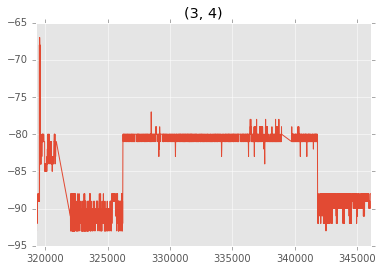

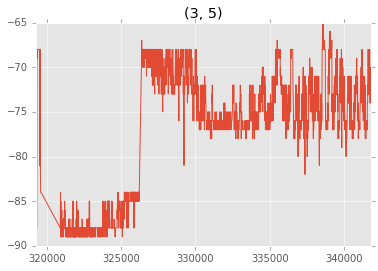

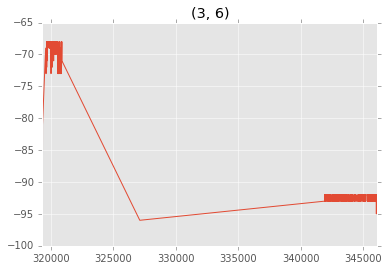

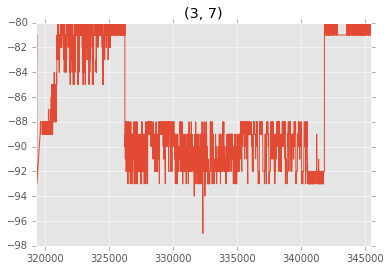

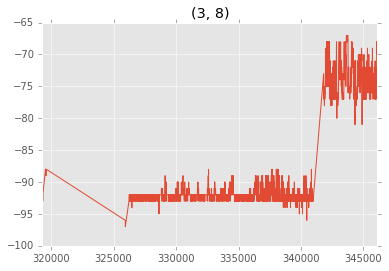

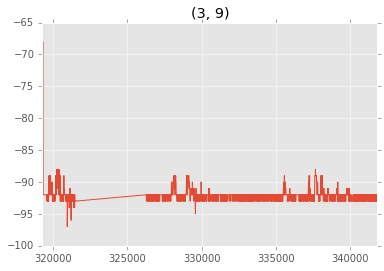

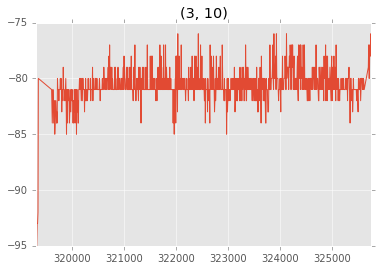

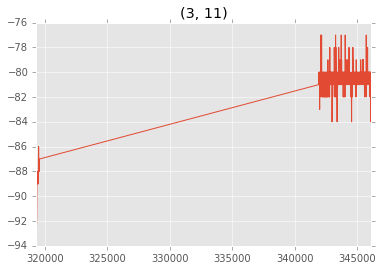

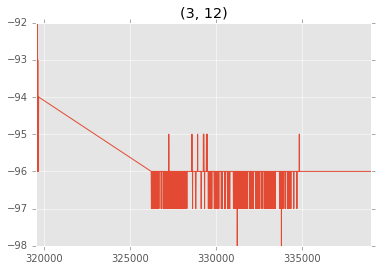

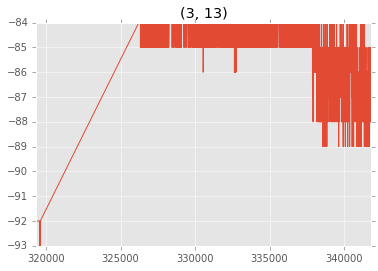

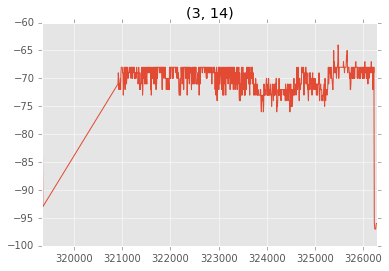

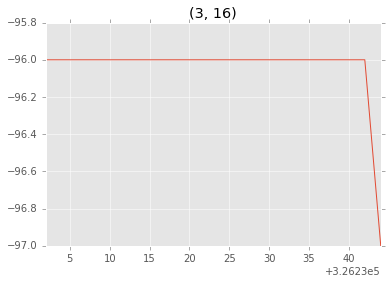

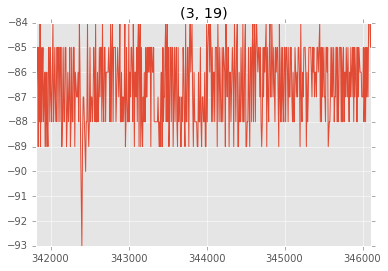

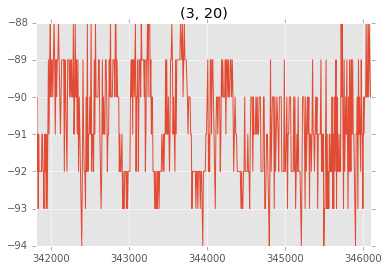

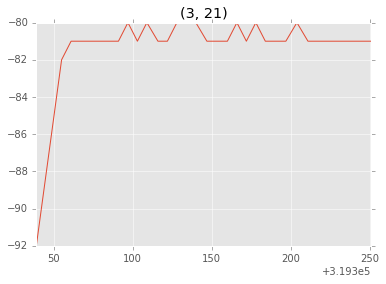

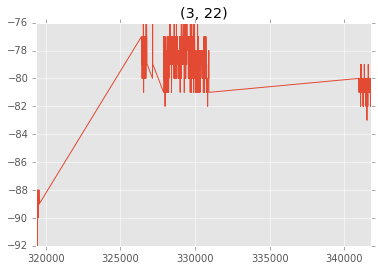

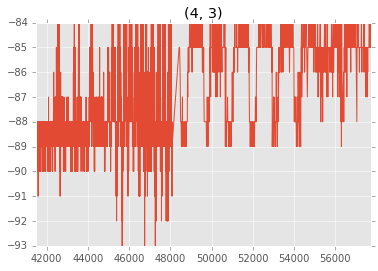

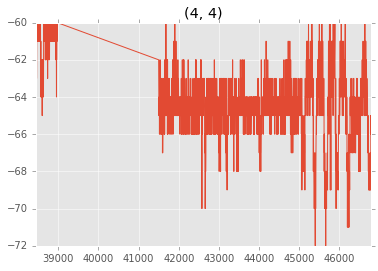

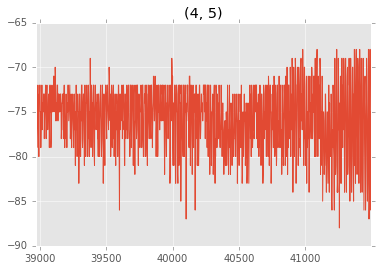

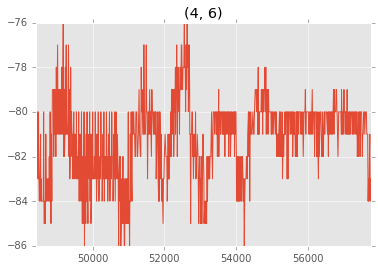

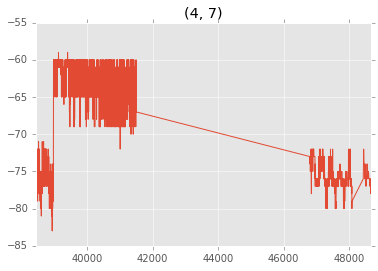

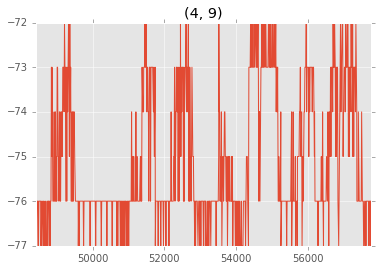

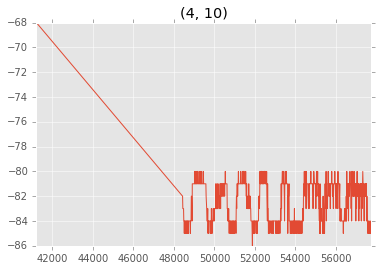

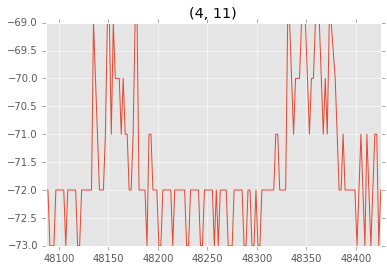

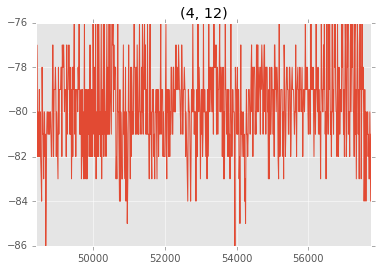

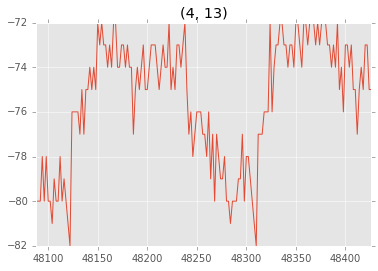

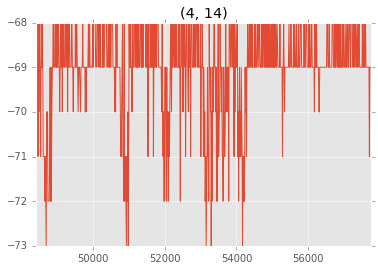

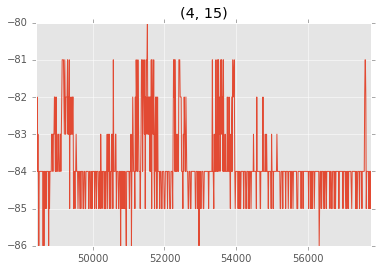

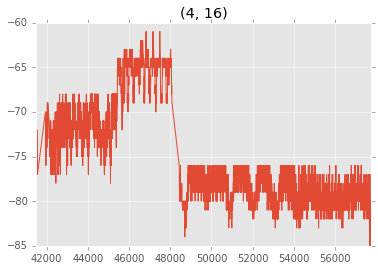

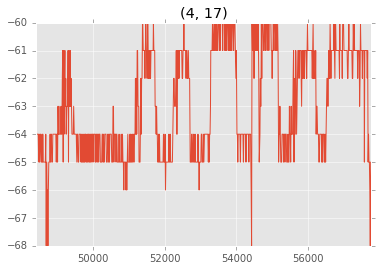

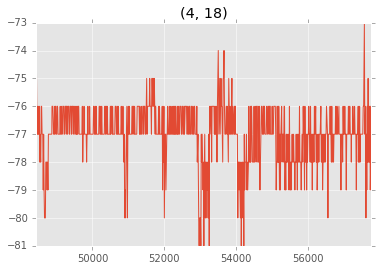

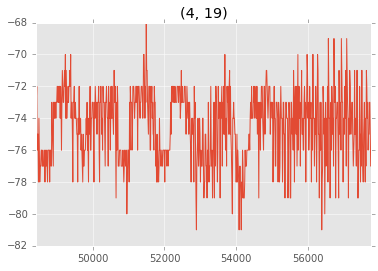

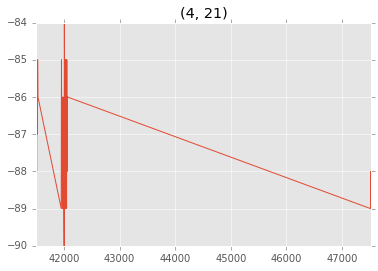

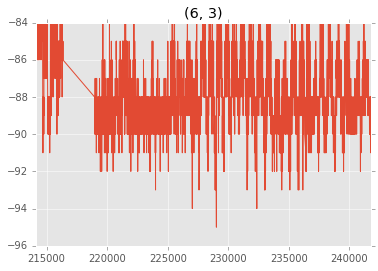

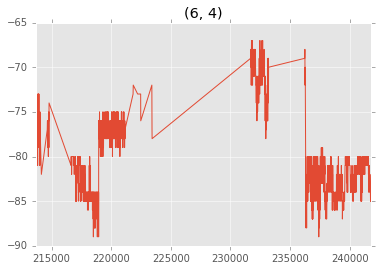

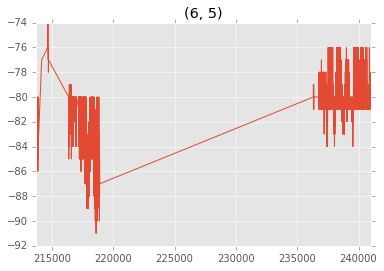

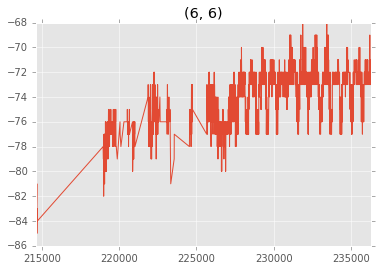

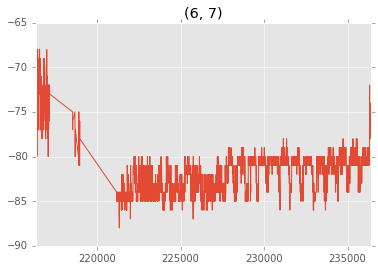

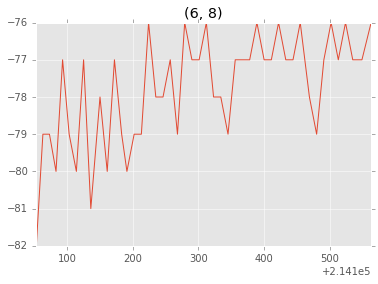

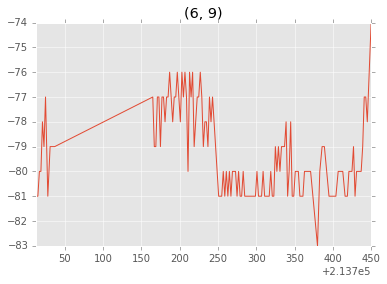

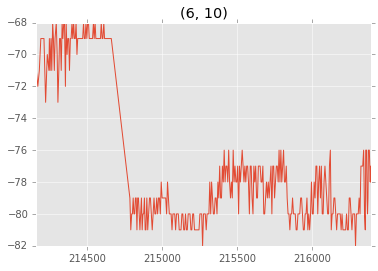

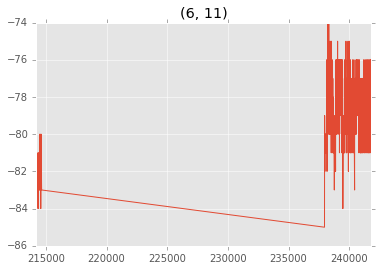

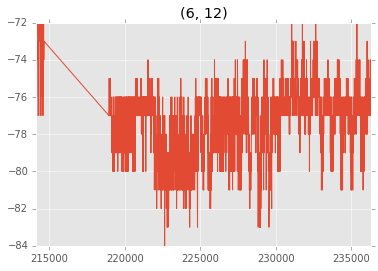

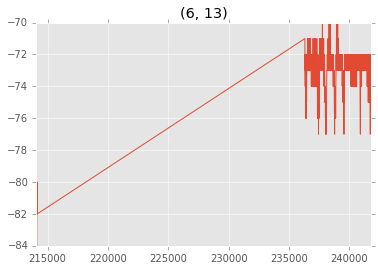

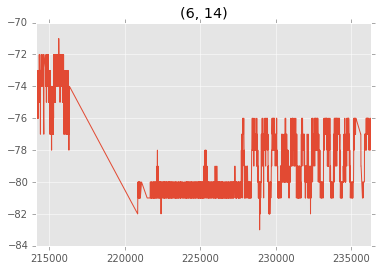

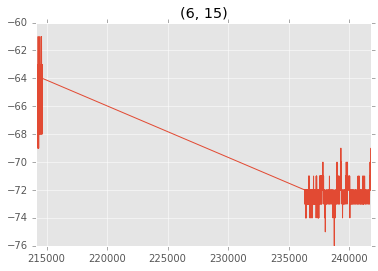

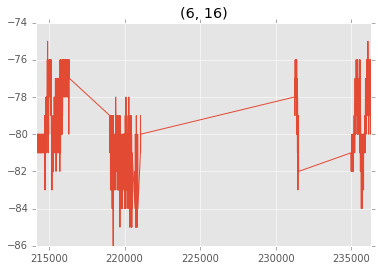

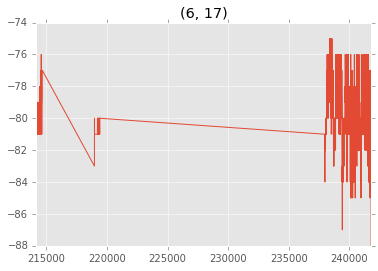

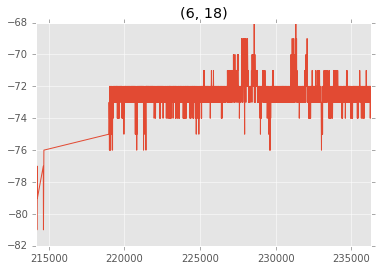

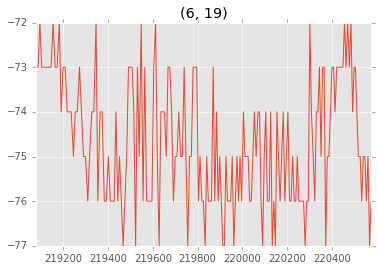

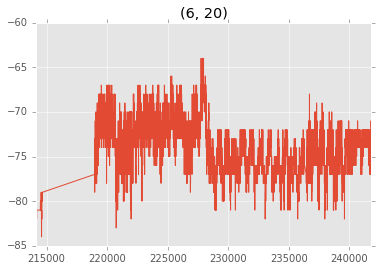

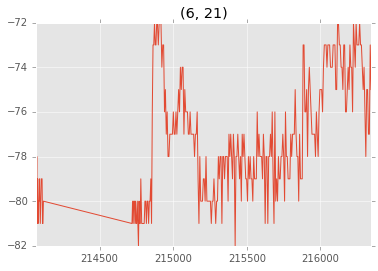

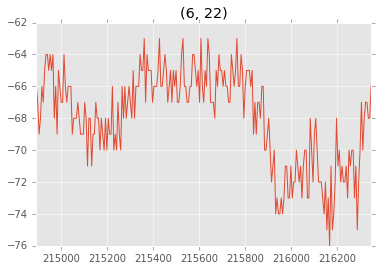

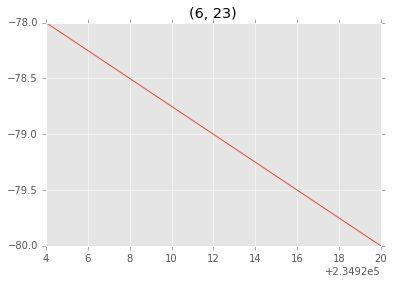

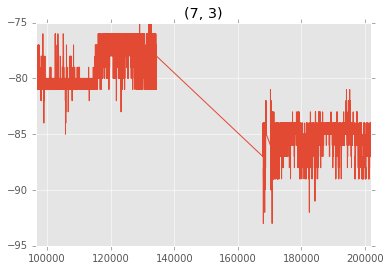

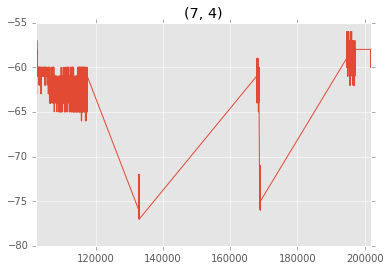

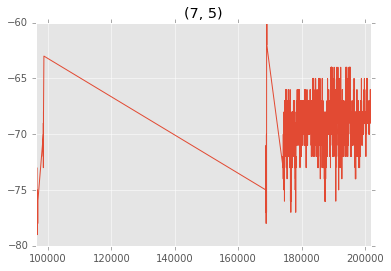

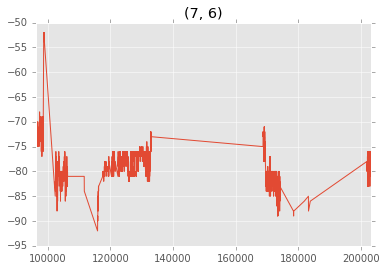

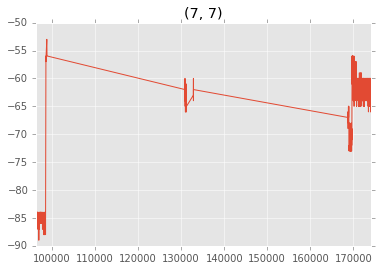

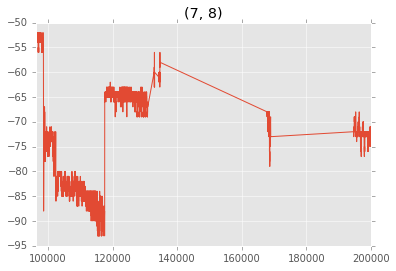

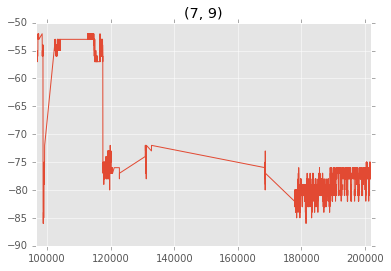

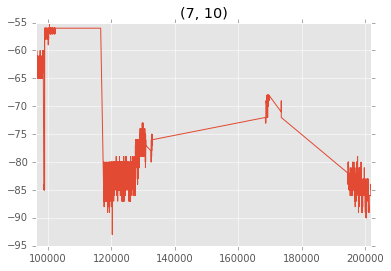

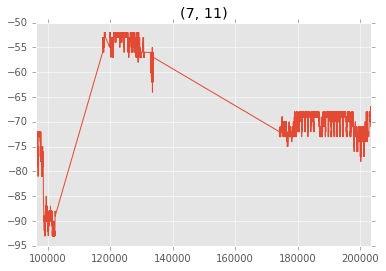

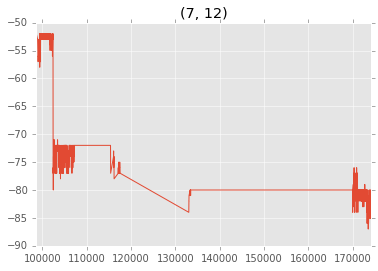

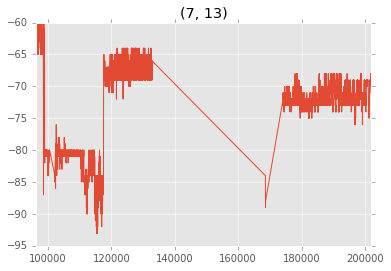

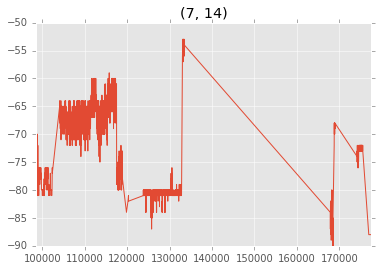

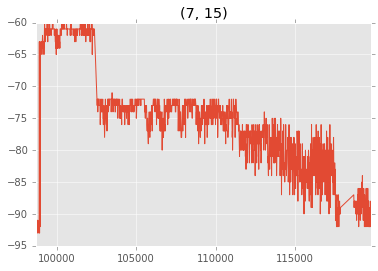

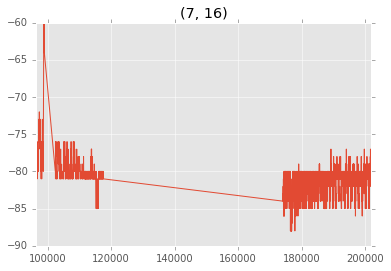

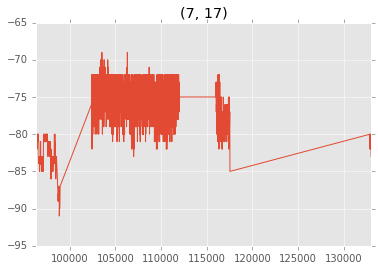

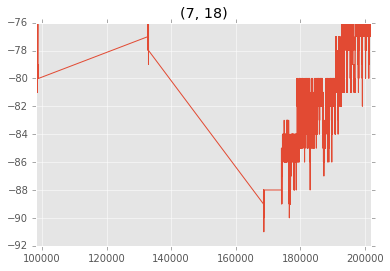

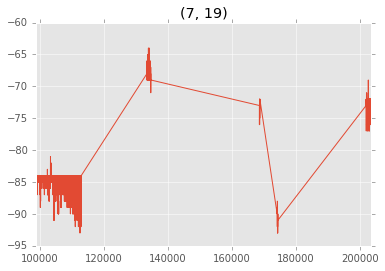

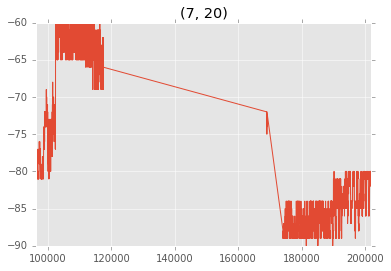

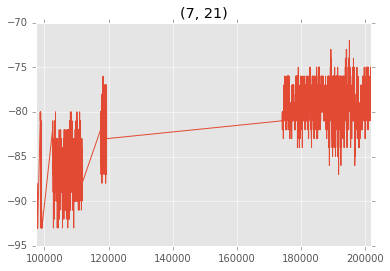

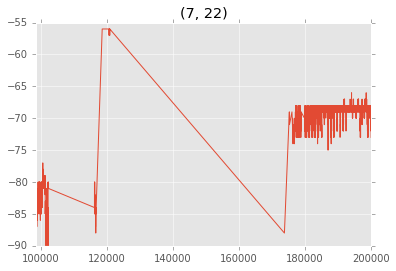

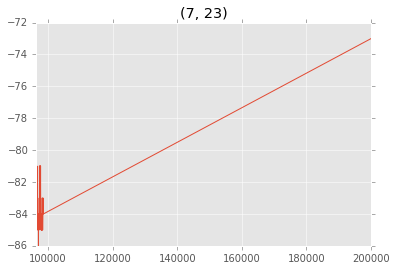

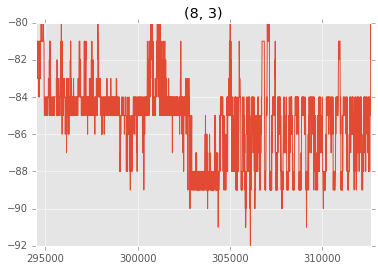

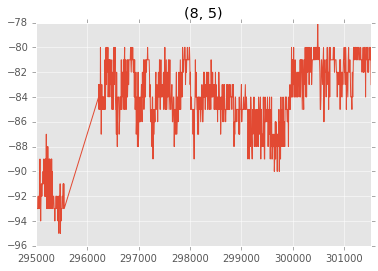

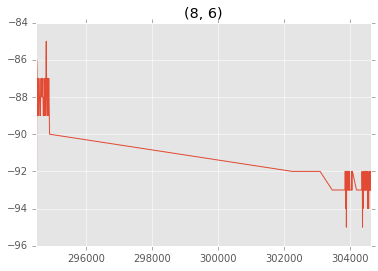

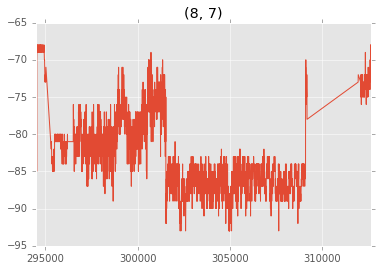

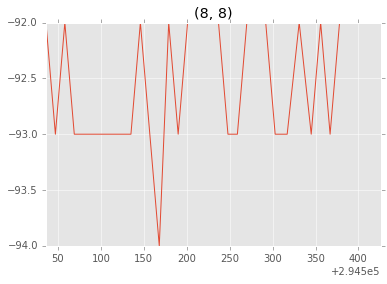

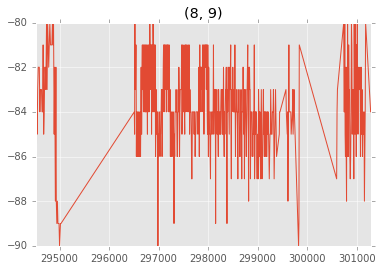

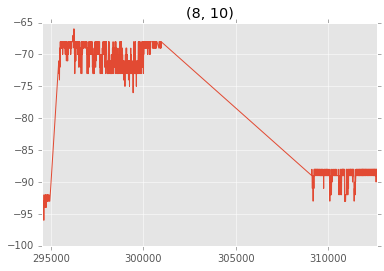

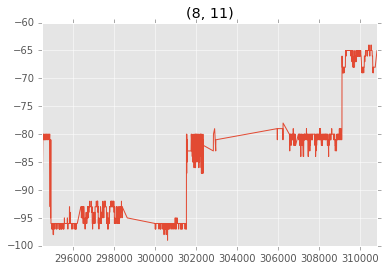

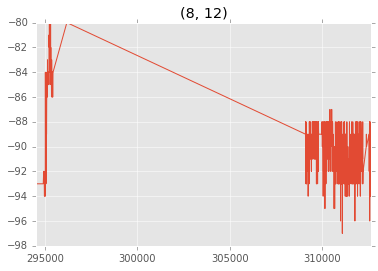

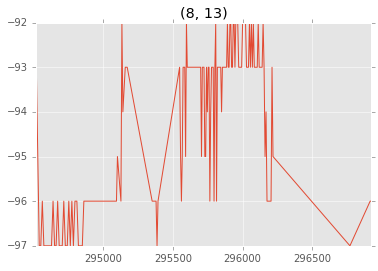

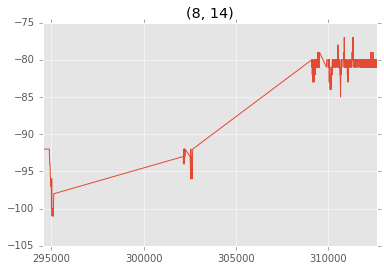

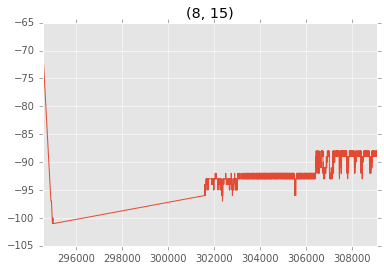

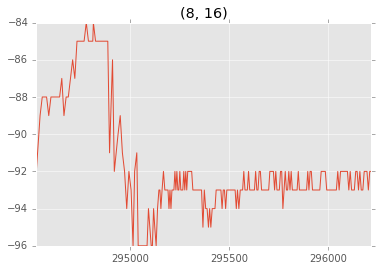

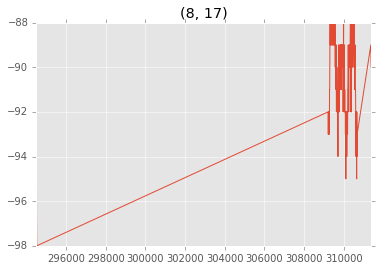

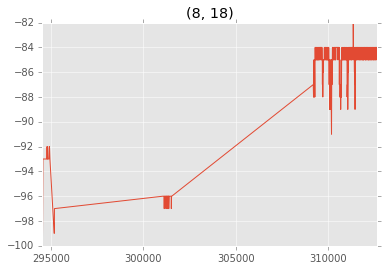

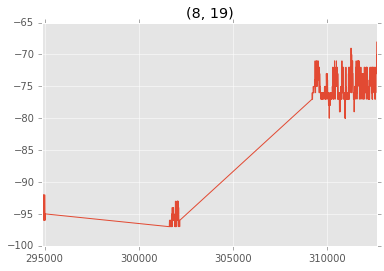

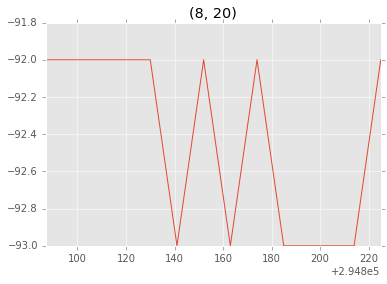

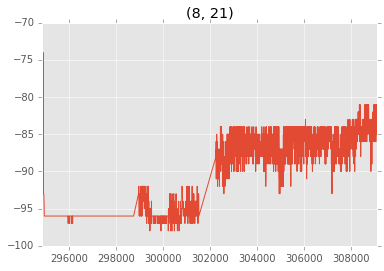

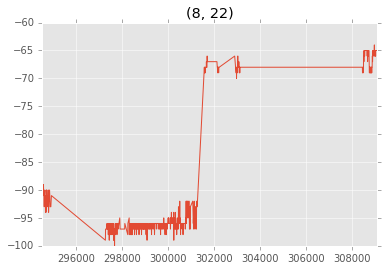

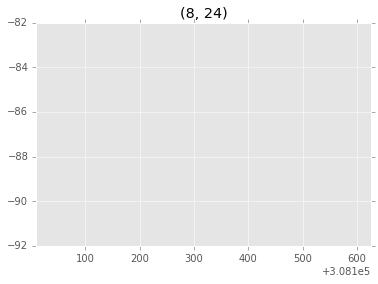

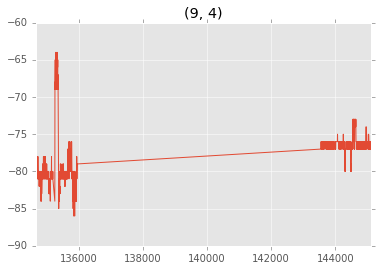

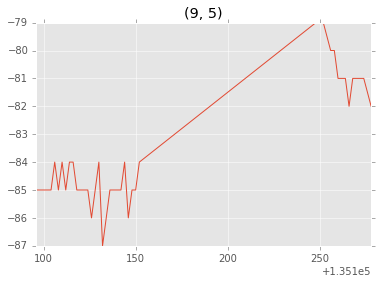

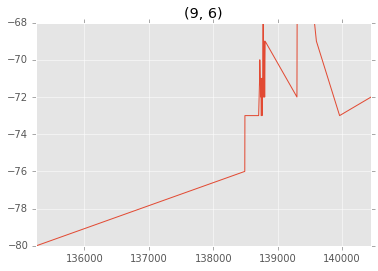

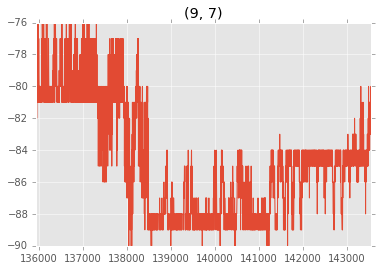

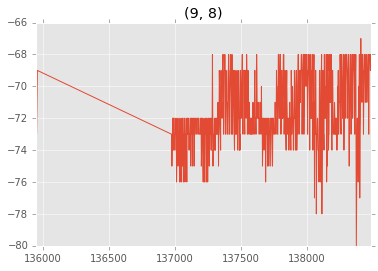

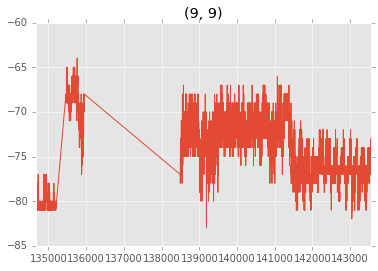

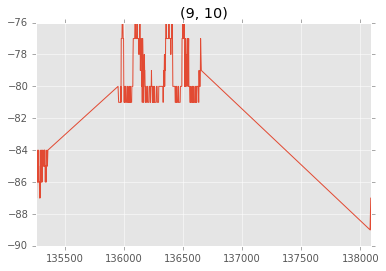

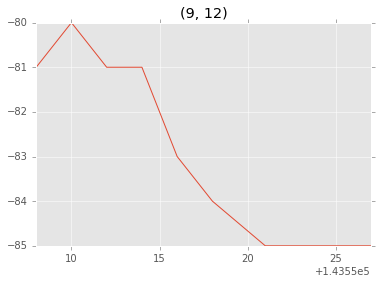

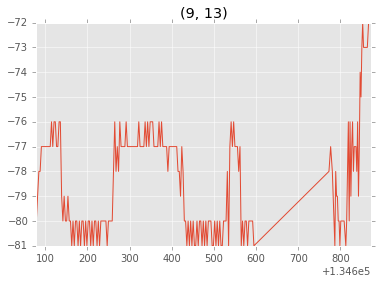

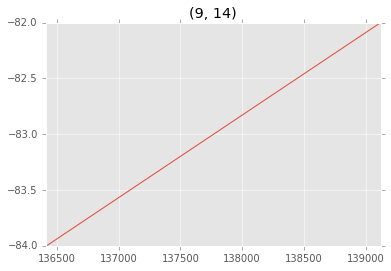

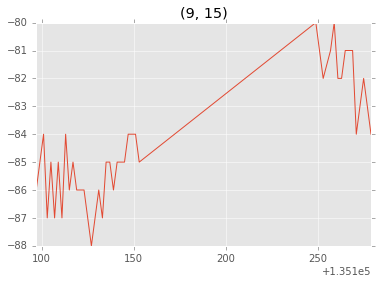

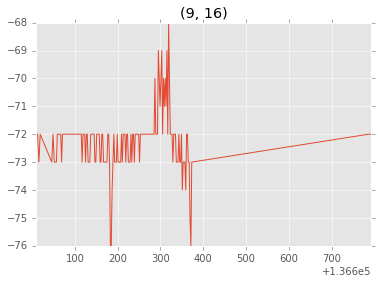

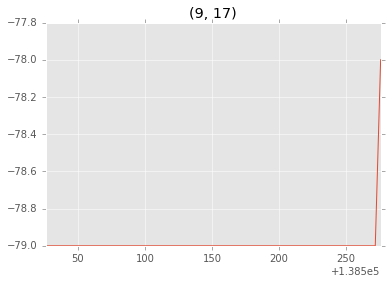

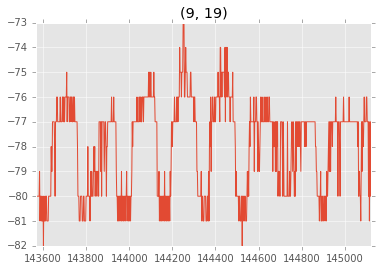

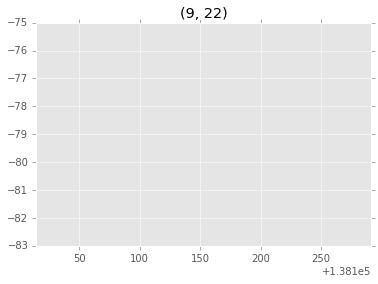

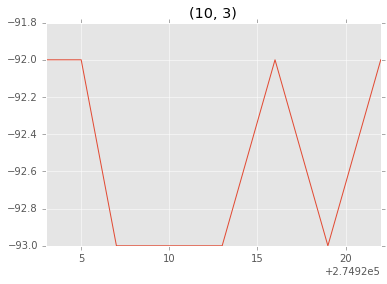

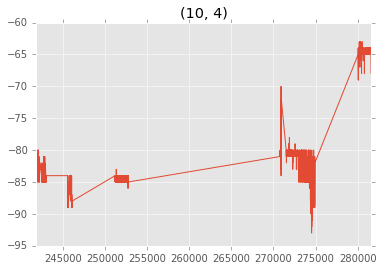

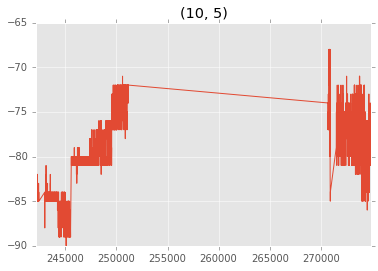

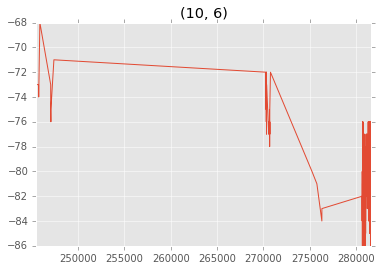

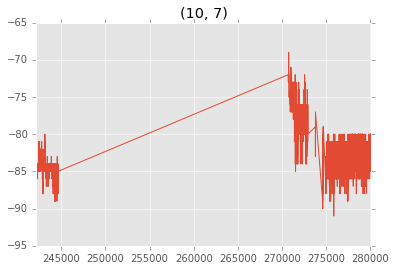

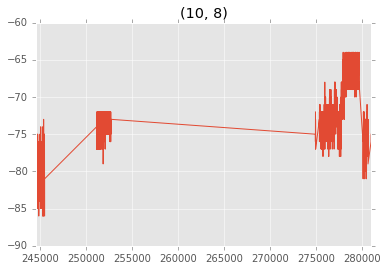

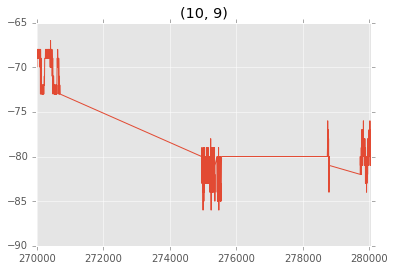

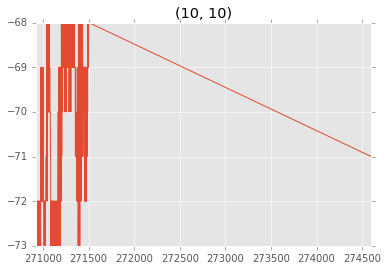

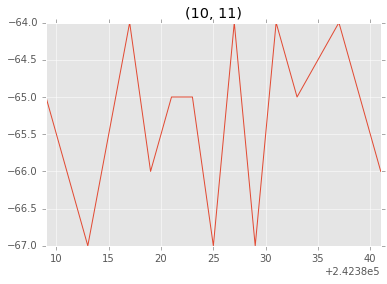

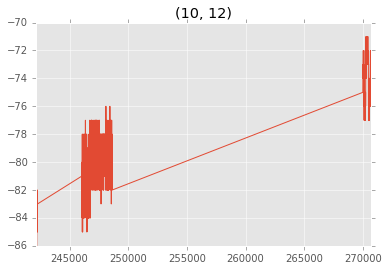

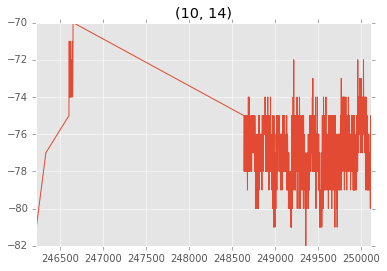

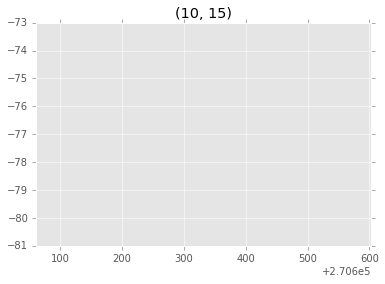

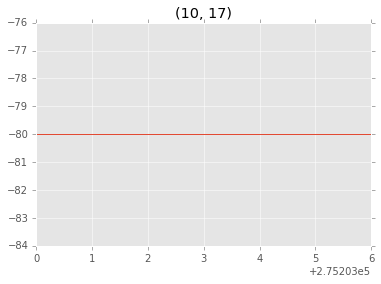

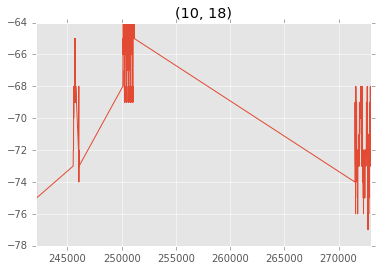

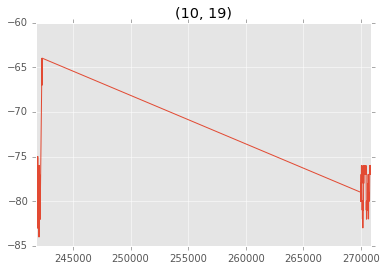

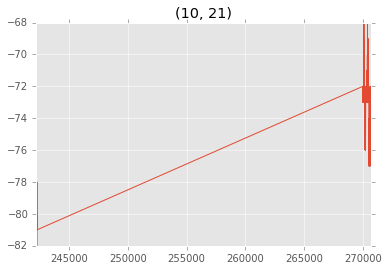

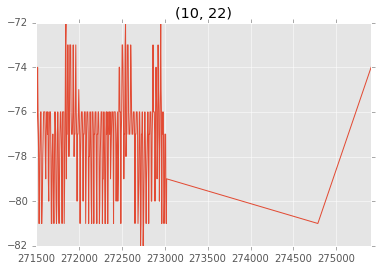

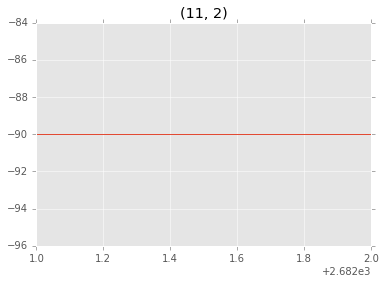

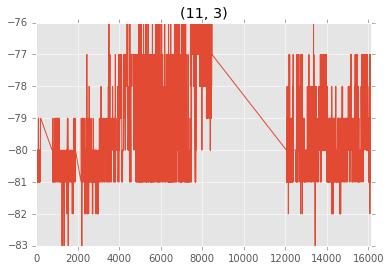

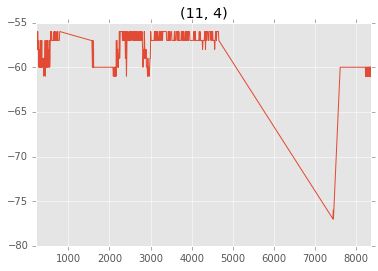

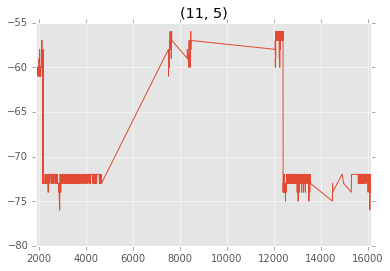

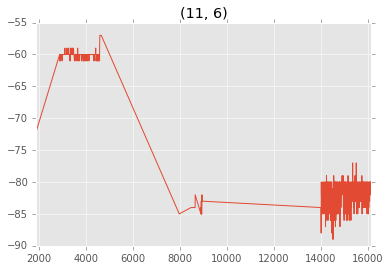

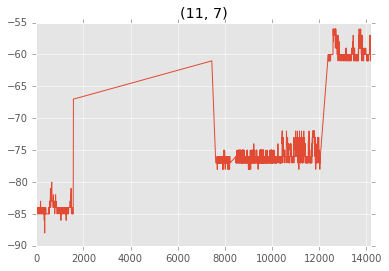

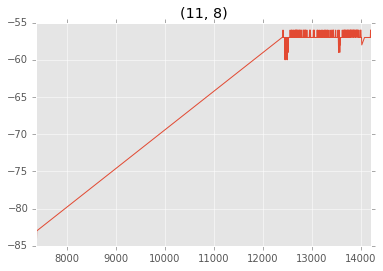

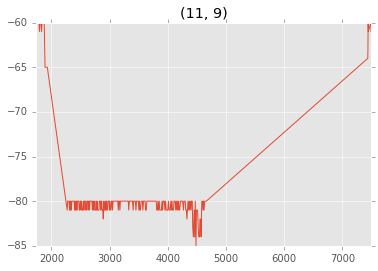

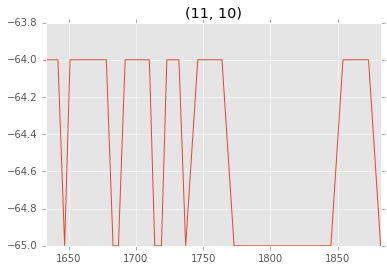

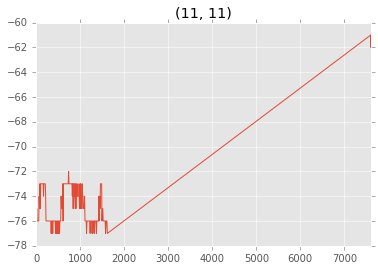

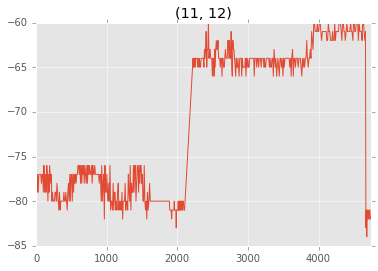

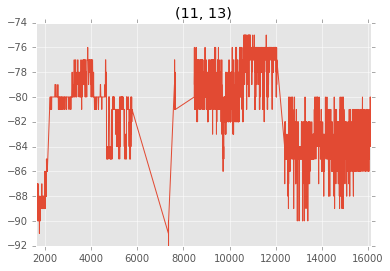

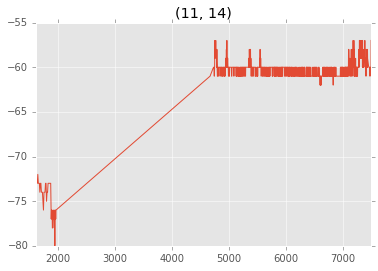

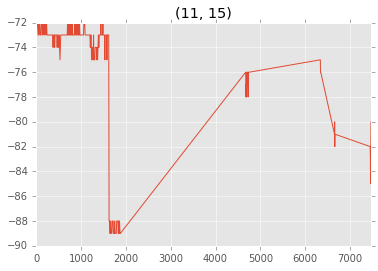

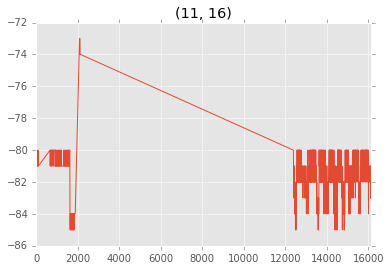

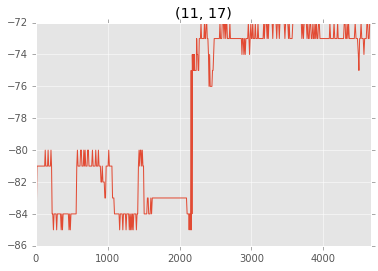

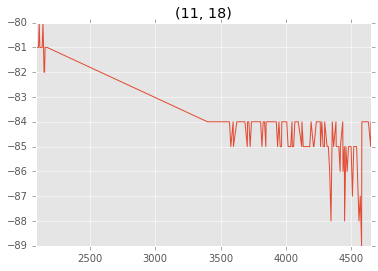

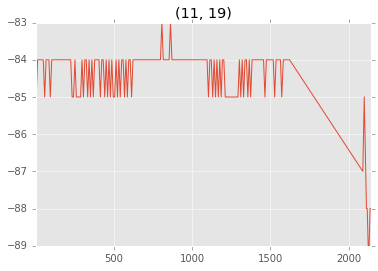

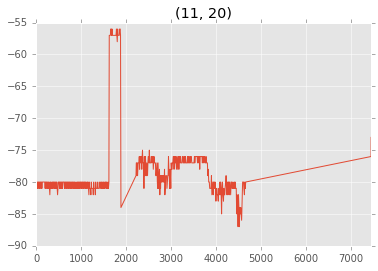

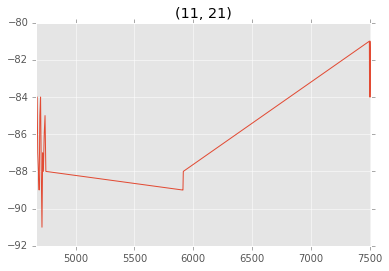

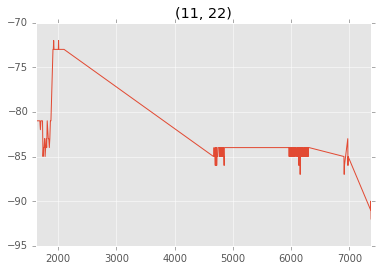

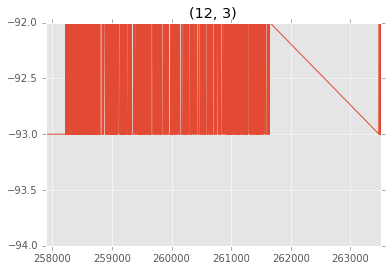

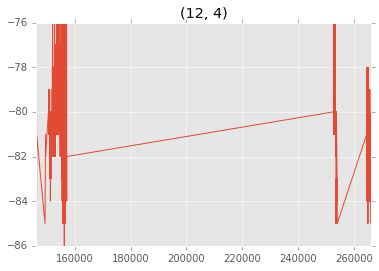

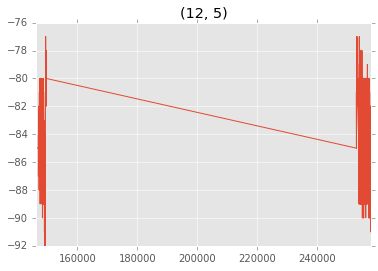

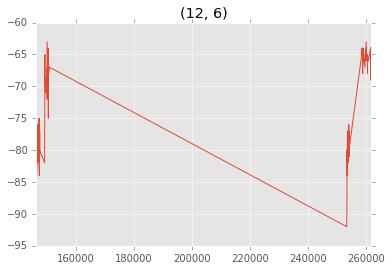

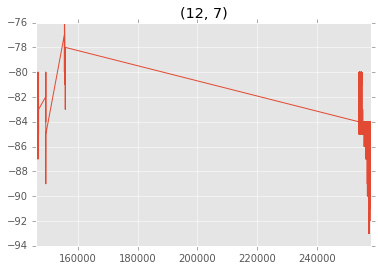

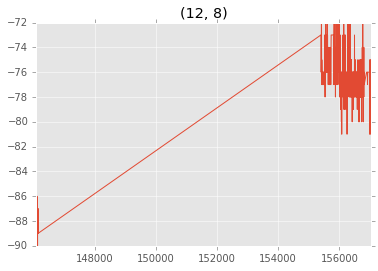

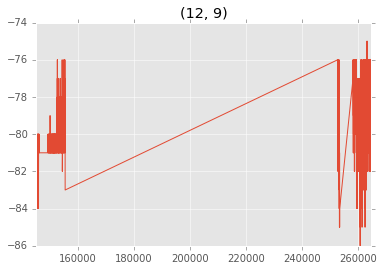

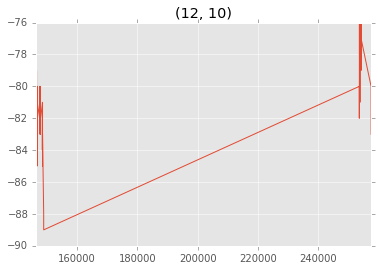

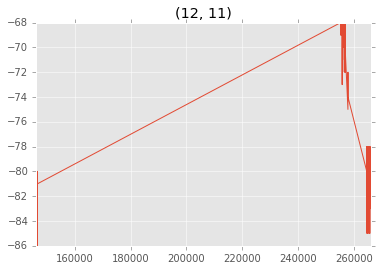

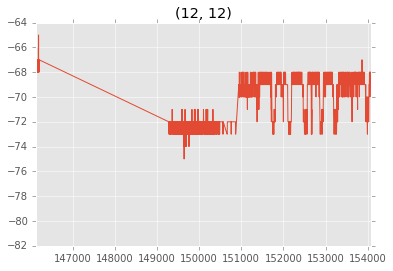

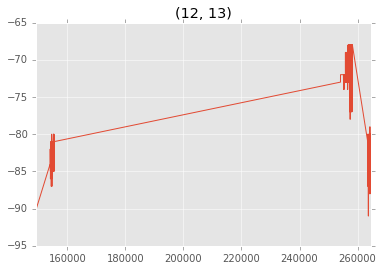

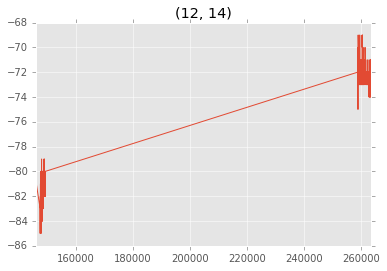

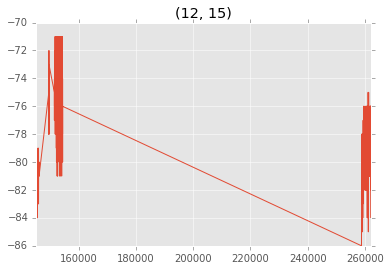

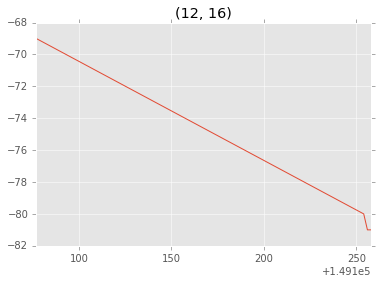

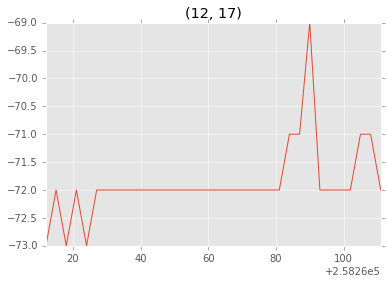

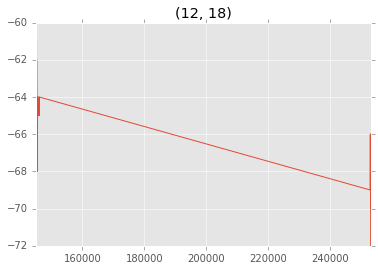

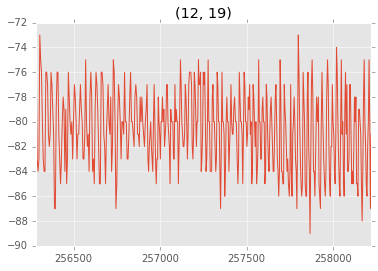

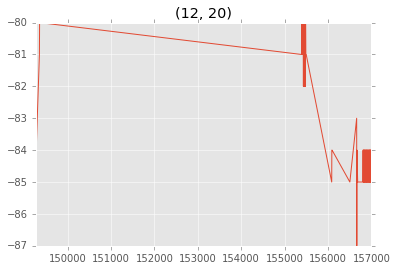

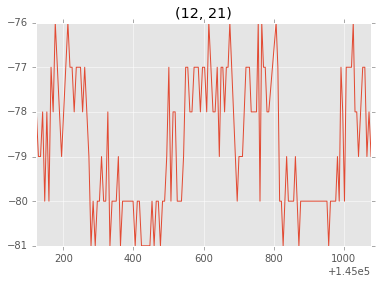

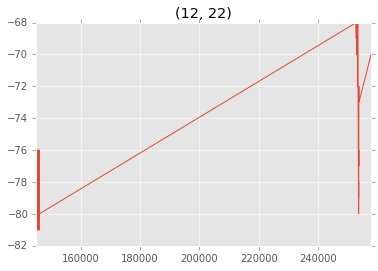

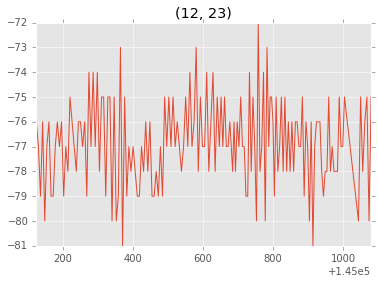

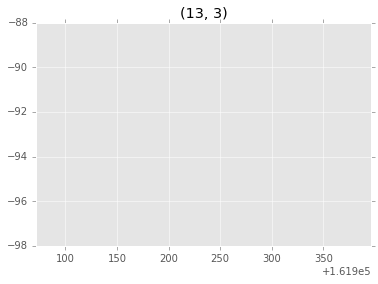

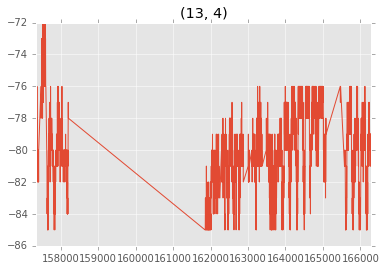

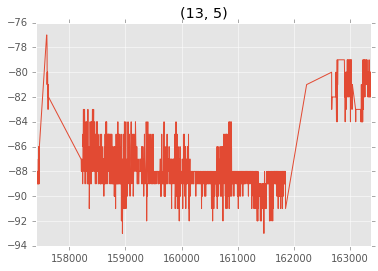

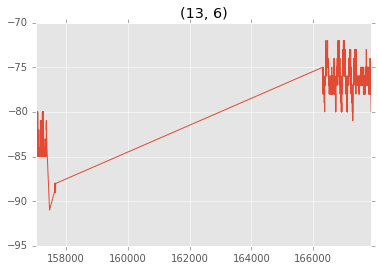

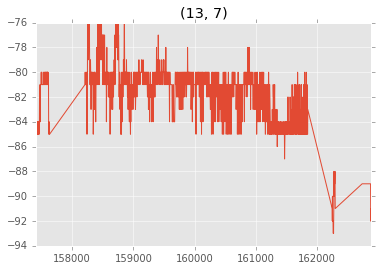

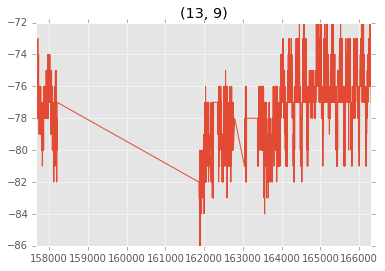

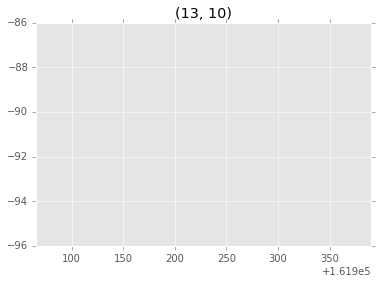

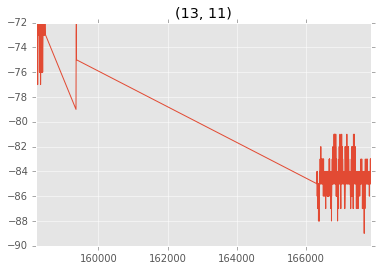

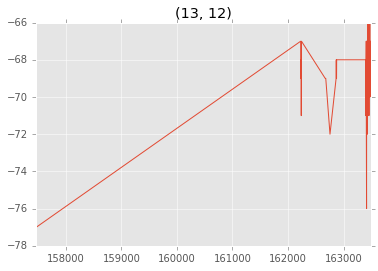

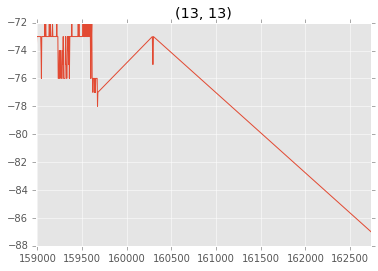

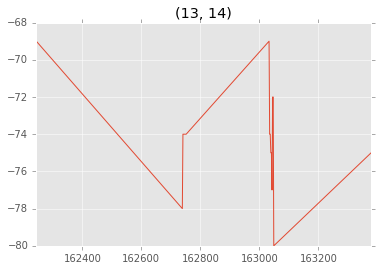

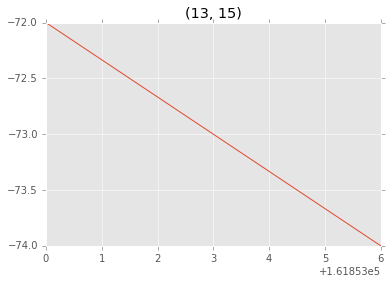

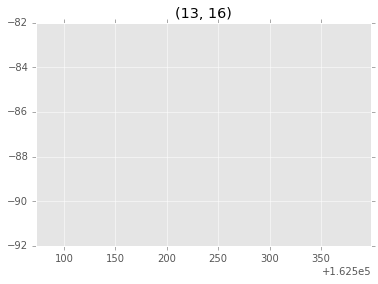

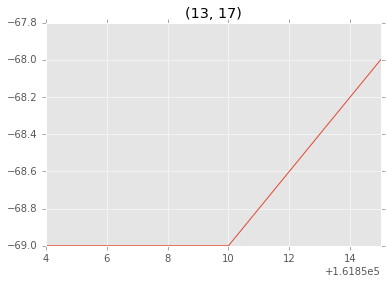

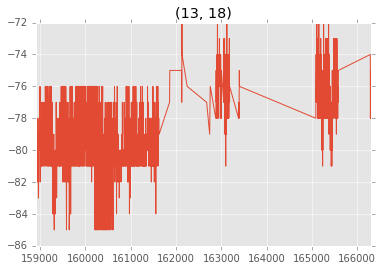

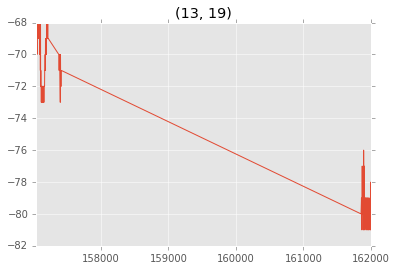

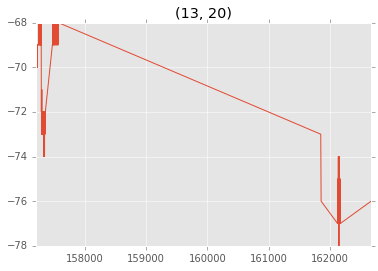

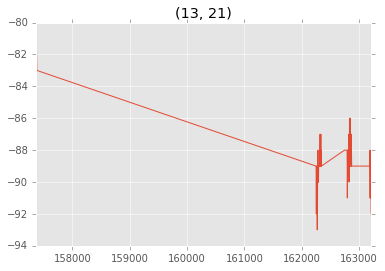

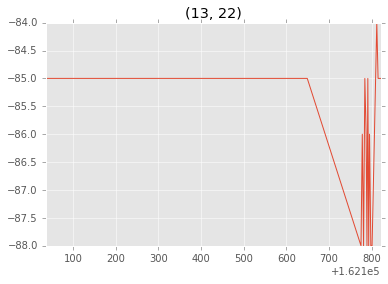

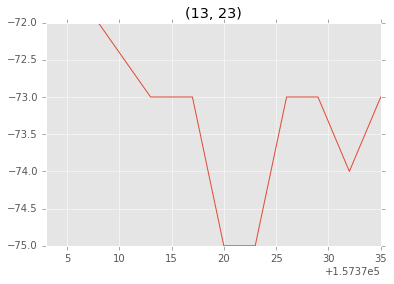

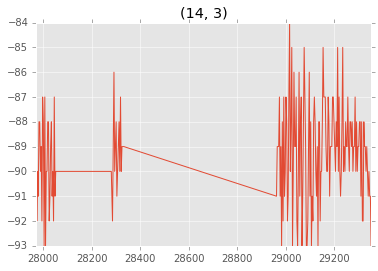

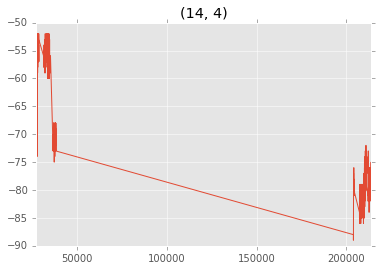

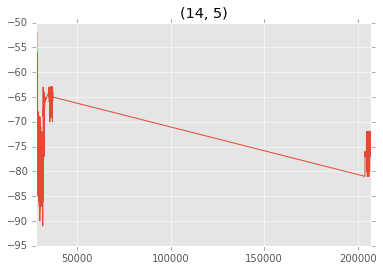

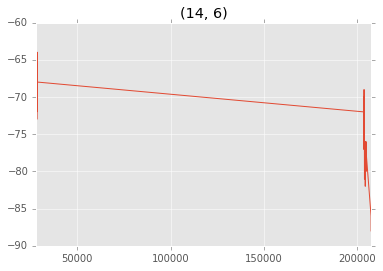

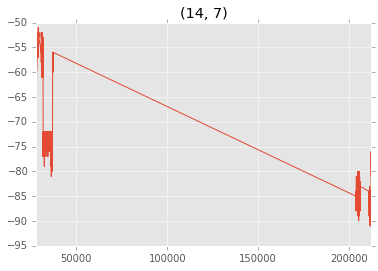

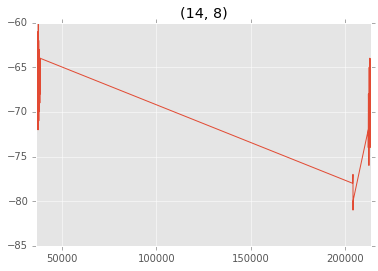

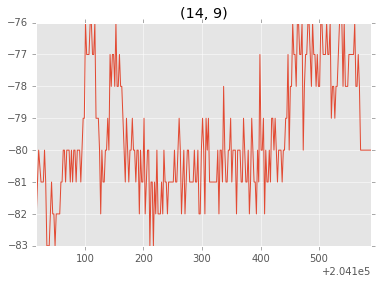

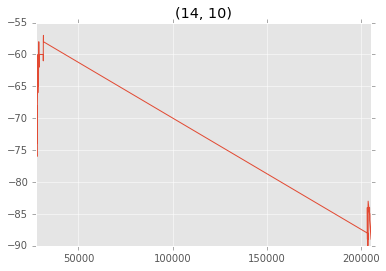

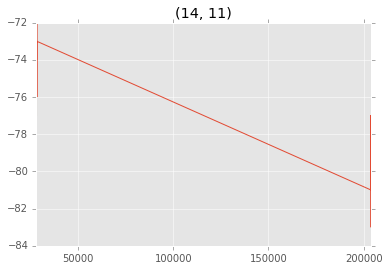

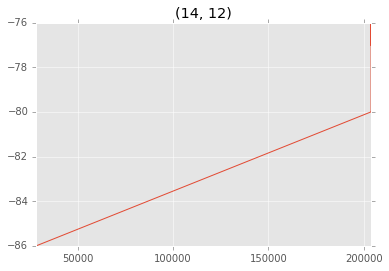

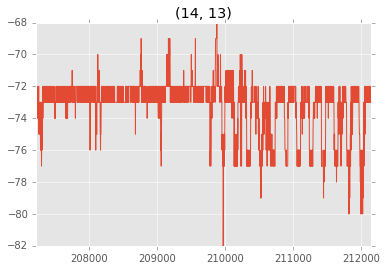

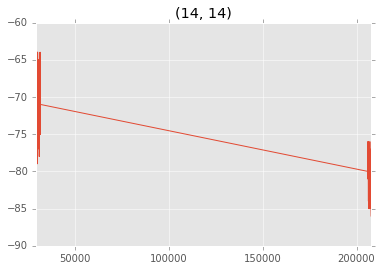

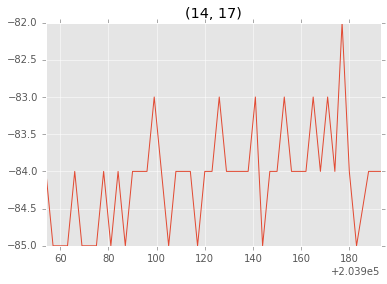

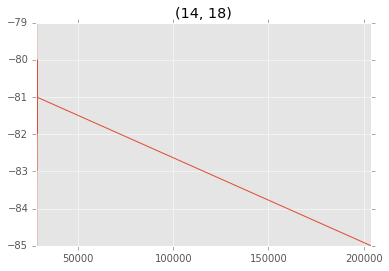

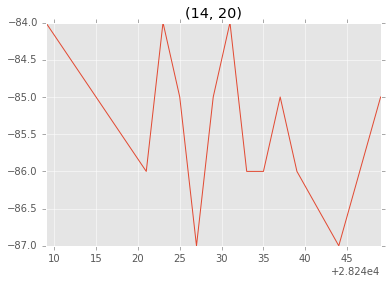

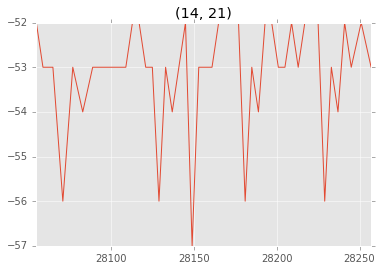

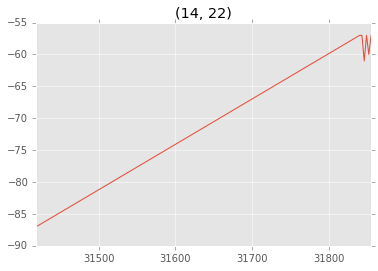

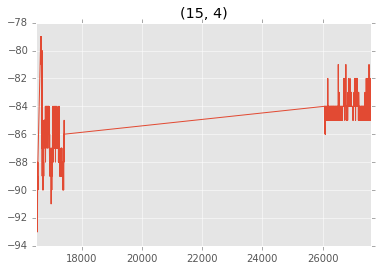

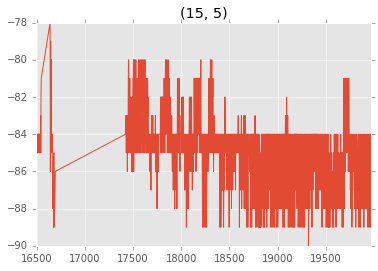

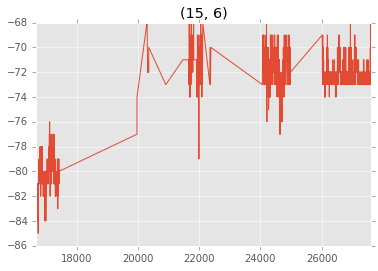

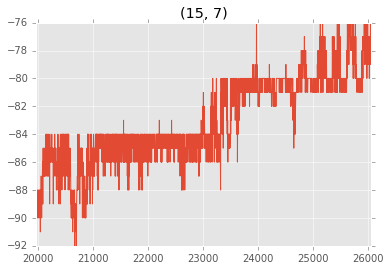

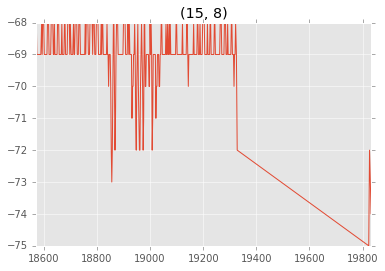

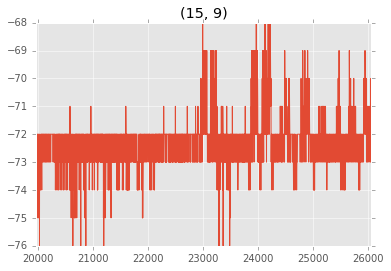

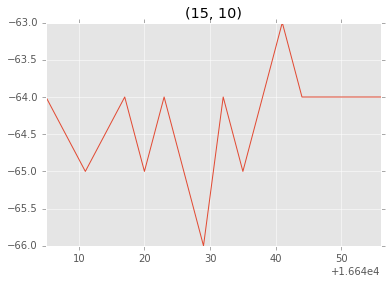

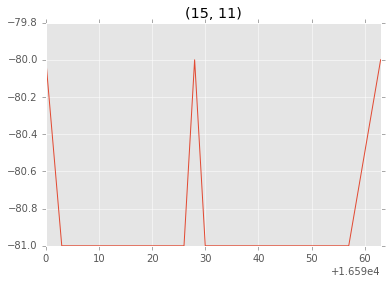

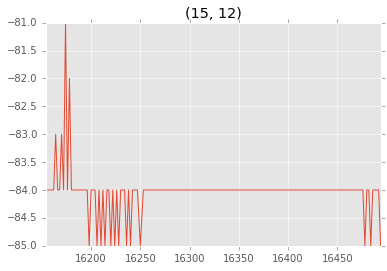

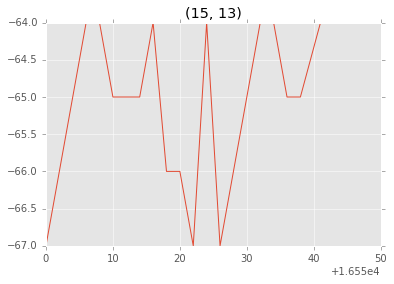

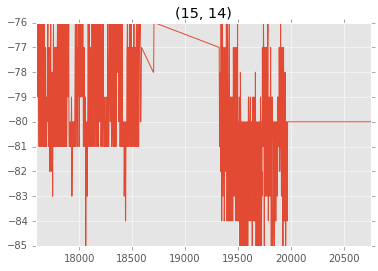

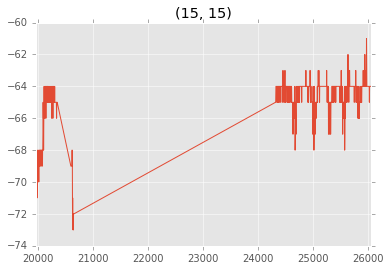

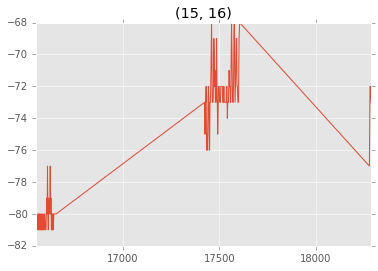

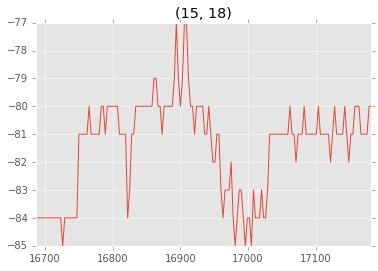

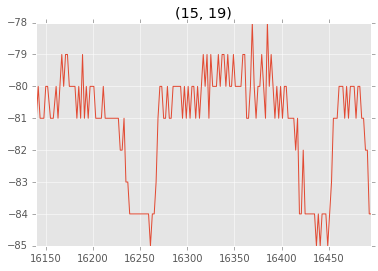

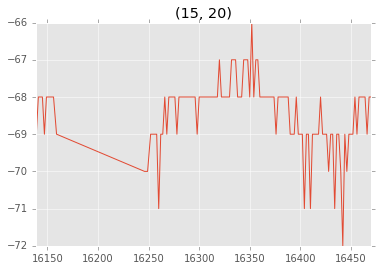

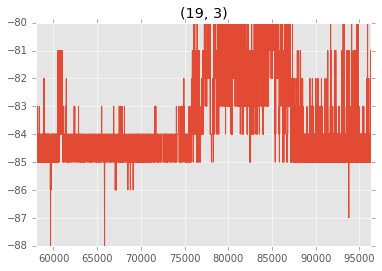

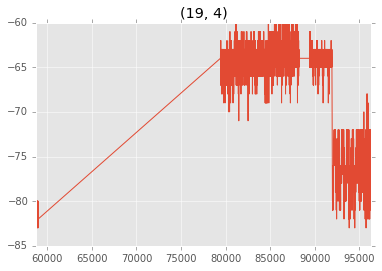

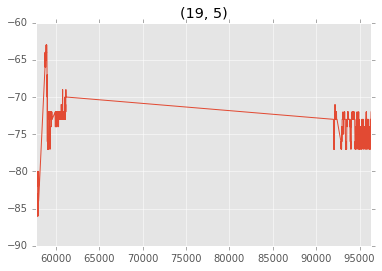

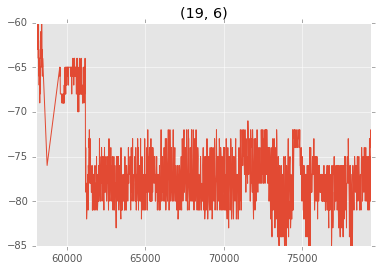

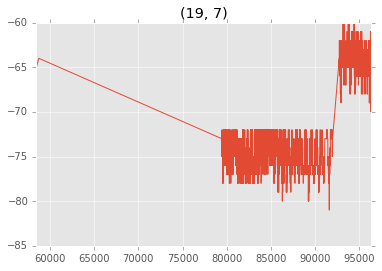

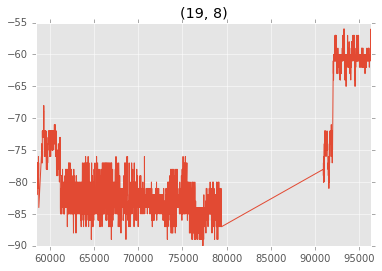

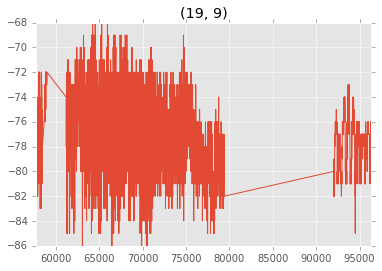

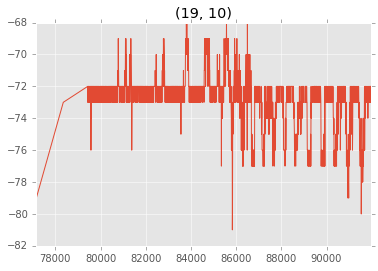

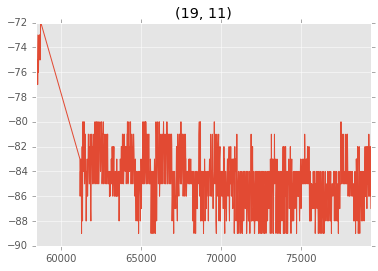

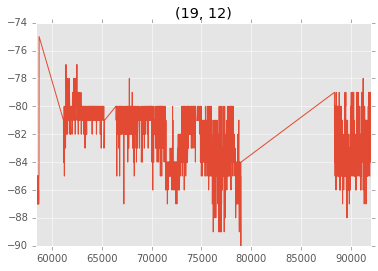

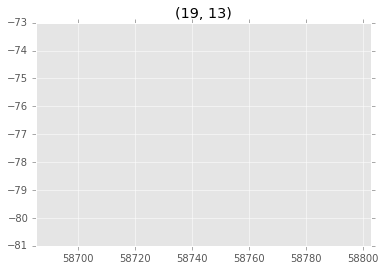

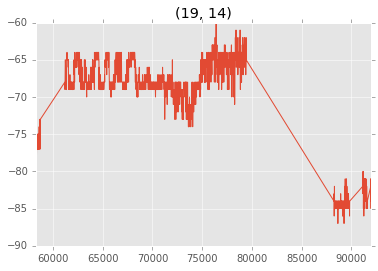

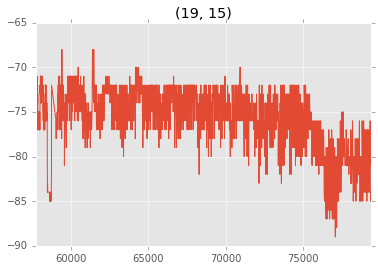

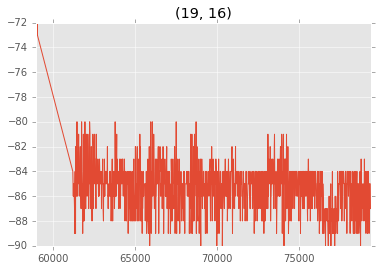

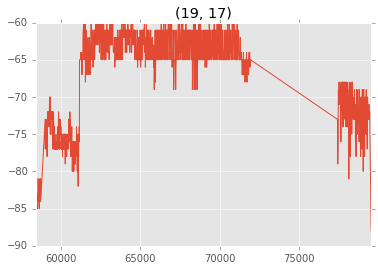

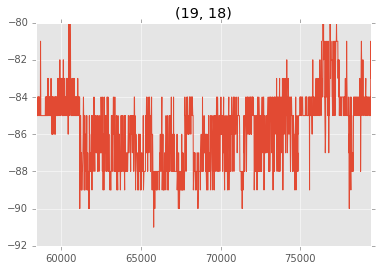

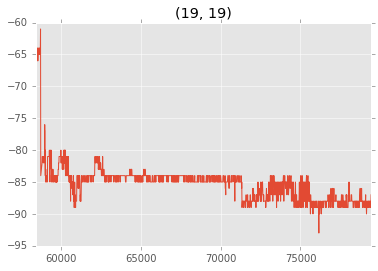

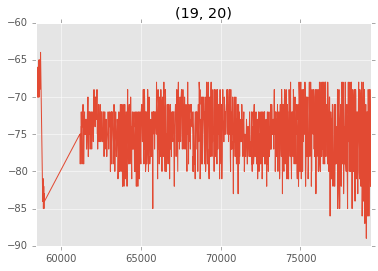

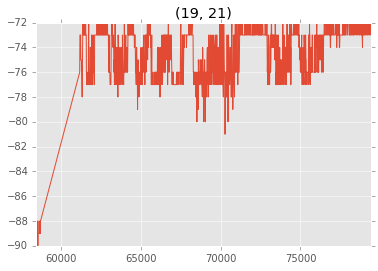

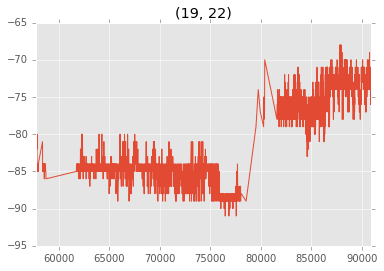

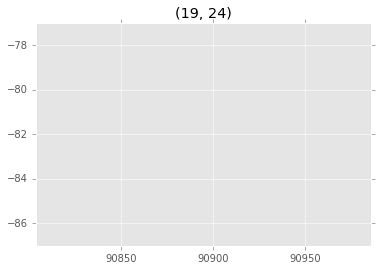

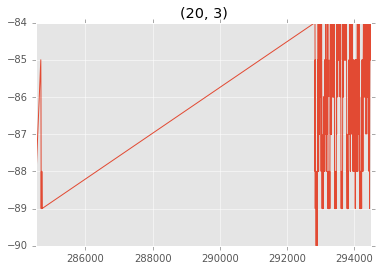

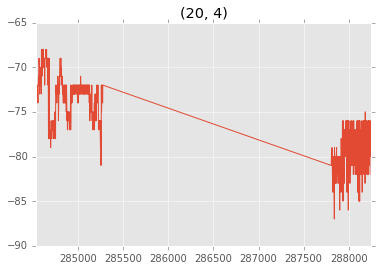

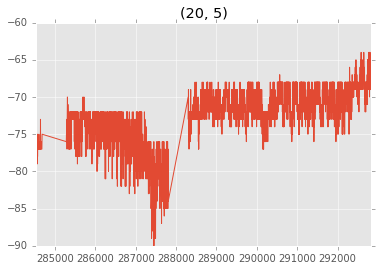

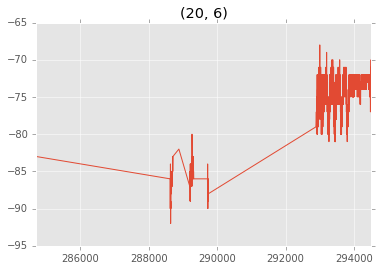

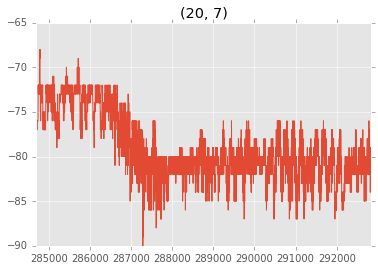

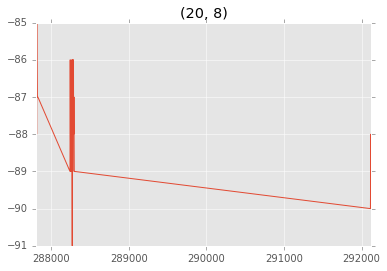

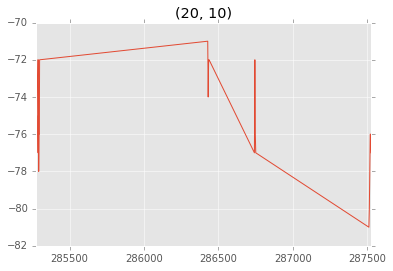

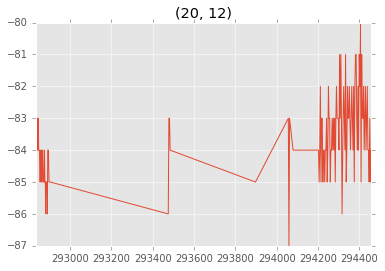

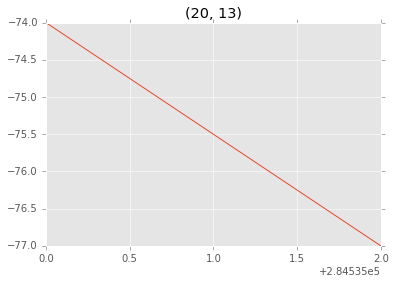

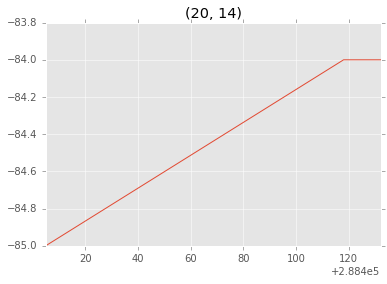

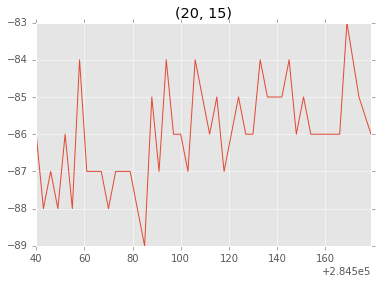

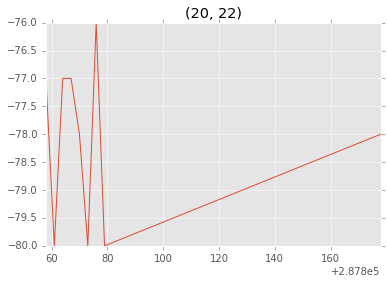

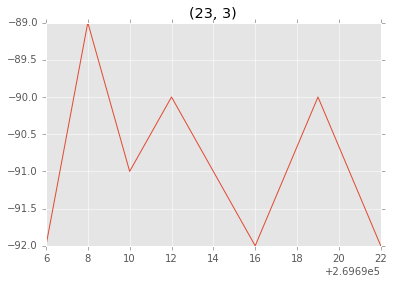

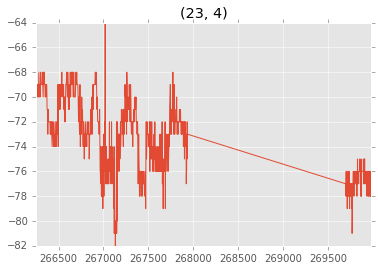

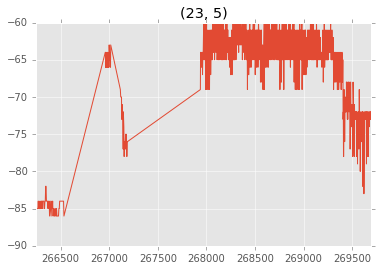

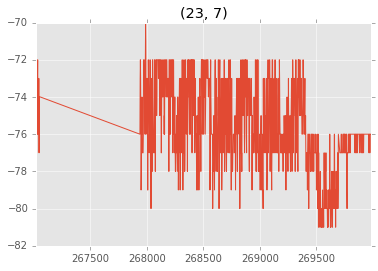

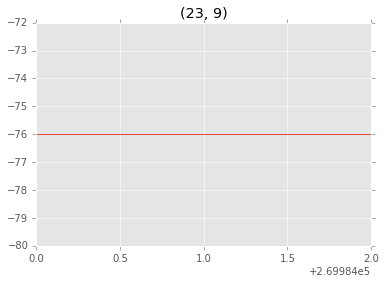

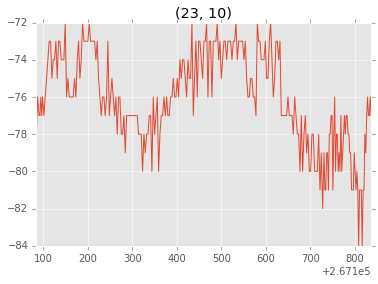

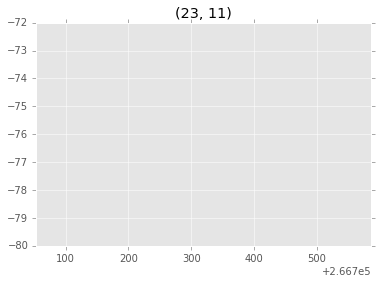

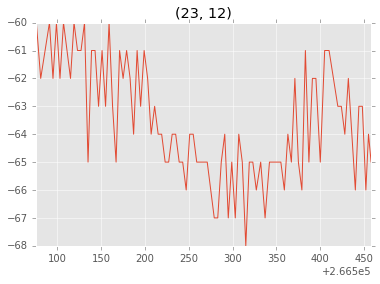

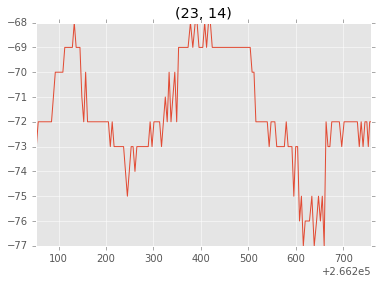

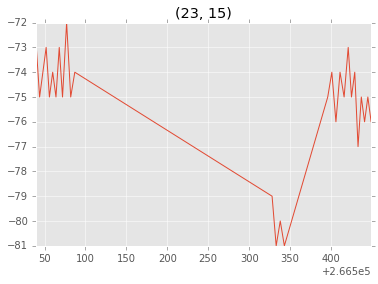

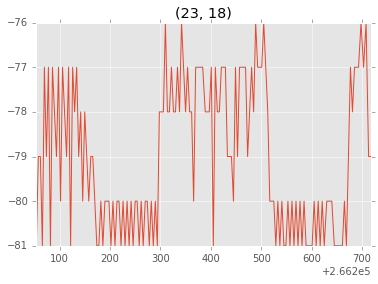

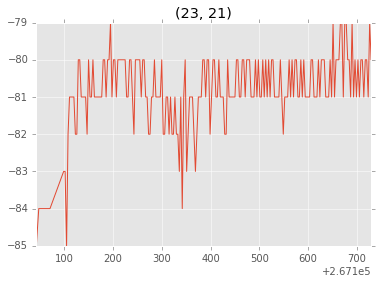

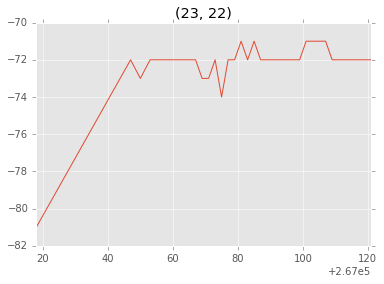

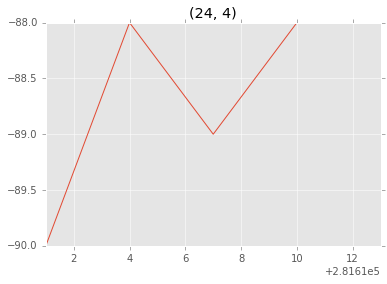

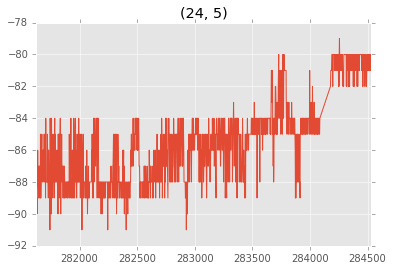

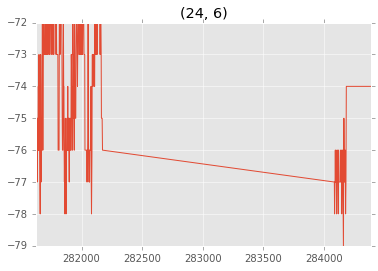

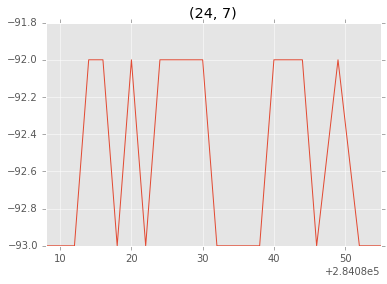

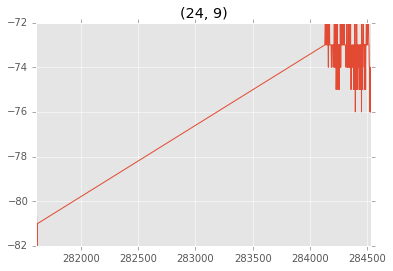

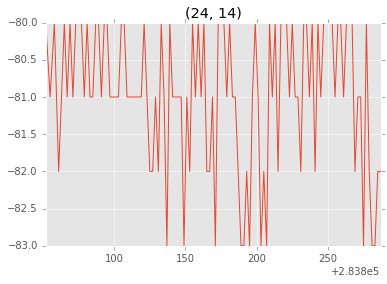

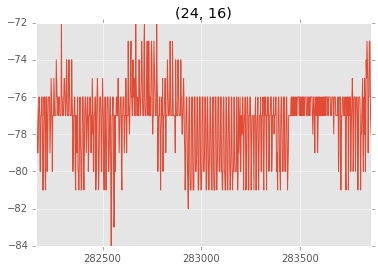

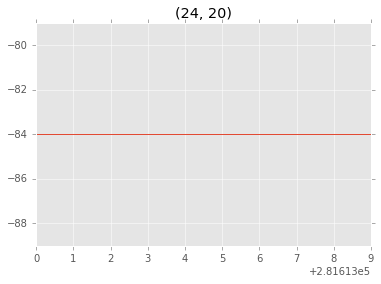

In [5]:
for name, group in grouped.rssi:
    plt.figure()
    group.plot(x="time", y="rssi", title=str(name), legend=False)